In [3]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузка датасета
df = pd.read_csv('C:\\Users\\nasty\\Desktop\\homeworks\\aie-group\\S02-hw-dataset.csv')
print(f" Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")

 Размер датасета: 41 строк, 5 столбцов


In [ ]:
print("Первые 10 строк данных:")
display(df.head(10))


Первые 10 строк данных:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [7]:
print("Информация о датасете:")
df.info()

print("Основные статистики:")
display(df.describe(include='all'))

print(f"Уникальные значения по столбцам:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} уникальных значений")

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
Основные статистики:


,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


Уникальные значения по столбцам:
user_id: 40 уникальных значений
age: 28 уникальных значений
country: 5 уникальных значений
purchases: 12 уникальных значений
revenue: 37 уникальных значений


Таблица пропусков:


,Пропущенные значения,Процент (%)
user_id,0,0.00
age,2,4.88
country,0,0.00
purchases,0,0.00
revenue,0,0.00


Общая статистика:
Всего пропусков в датасете: 2
Общий процент пропусков: 0.98%


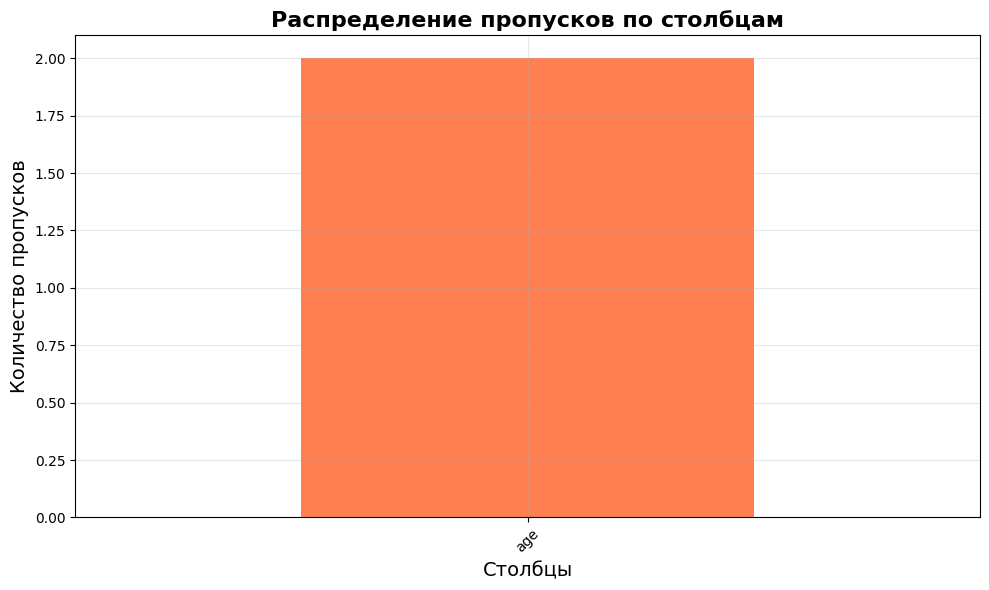

In [8]:
# Считаем пропуски
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)

# Создаем таблицу с результатами
missing_df = pd.DataFrame({
    'Пропущенные значения': missing_data,
    'Процент (%)': missing_percentage
})

print("Таблица пропусков:")
display(missing_df)

print(f"Общая статистика:")
print(f"Всего пропусков в датасете: {df.isnull().sum().sum()}")
print(f"Общий процент пропусков: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Визуализация пропусков
if missing_data.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_data[missing_data > 0].plot(kind='bar', color='coral')
    plt.title('Распределение пропусков по столбцам', fontsize=16, fontweight='bold')
    plt.xlabel('Столбцы', fontsize=14)
    plt.ylabel('Количество пропусков', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Пропусков в данных не обнаружено!")

In [9]:
# Проверка полных дубликатов
duplicate_rows = df.duplicated()
print(f"Количество полных дубликатов: {duplicate_rows.sum()}")

if duplicate_rows.sum() > 0:
    print("Примеры дублирующих строк:")
    display(df[duplicate_rows].head())
    
    # Удаляем дубликаты для чистого анализа
    df_clean = df.drop_duplicates()
    print(f"Удалено {duplicate_rows.sum()} дубликатов")
    print(f"Новый размер датасета: {df_clean.shape}")
else:
    df_clean = df.copy()
    print("Полные дубликаты не обнаружены")

# Проверка дубликатов по user_id (если это уникальный идентификатор)
if 'user_id' in df_clean.columns:
    duplicate_ids = df_clean['user_id'].duplicated().sum()
    print(f"Дубликатов user_id: {duplicate_ids}")
    if duplicate_ids > 0:
        print("Примеры дублирующихся user_id:")
        duplicates = df_clean[df_clean['user_id'].duplicated(keep=False)]
        display(duplicates.sort_values('user_id').head())

Количество полных дубликатов: 1
Примеры дублирующих строк:


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


Удалено 1 дубликатов
Новый размер датасета: (40, 5)
Дубликатов user_id: 0


In [10]:
# Проверка возраста
print("АНАЛИЗ ВОЗРАСТА:")
age_stats = {
    'Минимум': df_clean['age'].min(),
    'Максимум': df_clean['age'].max(),
    'Среднее': df_clean['age'].mean(),
    'Медиана': df_clean['age'].median()
}

for key, value in age_stats.items():
    print(f"{key}: {value}")

# Находим подозрительные значения возраста
suspicious_age = df_clean[
    (df_clean['age'] < 0) | 
    (df_clean['age'] > 100) |
    (df_clean['age'] < 5)  # Дети младше 5 лет могут быть подозрительными
]

if not suspicious_age.empty:
    print(f"Найдено подозрительных значений возраста: {len(suspicious_age)}")
    display(suspicious_age[['user_id', 'age', 'country']])
else:
    print("Подозрительных значений возраста не найдено")

# Проверка количества покупок
print("АНАЛИЗ КОЛИЧЕСТВА ПОКУПОК:")
purchases_stats = {
    'Минимум': df_clean['purchases'].min(),
    'Максимум': df_clean['purchases'].max(),
    'Среднее': df_clean['purchases'].mean(),
    'Медиана': df_clean['purchases'].median()
}

for key, value in purchases_stats.items():
    print(f"{key}: {value}")

# Подозрительные значения покупок
suspicious_purchases = df_clean[df_clean['purchases'] < 0]
if not suspicious_purchases.empty:
    print(f"Найдено подозрительных значений покупок: {len(suspicious_purchases)}")
    display(suspicious_purchases[['user_id', 'purchases', 'revenue']])
else:
    print("Подозрительных значений покупок не найдено")

# Проверка выручки
print("АНАЛИЗ ВЫРУЧКИ:")
revenue_stats = {
    'Минимум': df_clean['revenue'].min(),
    'Максимум': df_clean['revenue'].max(),
    'Среднее': df_clean['revenue'].mean(),
    'Медиана': df_clean['revenue'].median()
}

for key, value in revenue_stats.items():
    print(f"{key}: {value}")

# Подозрительные значения выручки
suspicious_revenue = df_clean[df_clean['revenue'] < 0]
if not suspicious_revenue.empty:
    print(f"Найдено подозрительных значений выручки: {len(suspicious_revenue)}")
    display(suspicious_revenue[['user_id', 'revenue', 'purchases']])
else:
    print("Подозрительных значений выручки не найдено")

# Проверка логических противоречий
print("ПРОВЕРКА ЛОГИЧЕСКИХ ПРОТИВОРЕЧИЙ:")

# Пользователи с 0 покупок, но ненулевой выручкой
contradiction_1 = df_clean[(df_clean['purchases'] == 0) & (df_clean['revenue'] > 0)]
print(f"Пользователи с 0 покупок, но ненулевой выручкой: {len(contradiction_1)}")
if not contradiction_1.empty:
    display(contradiction_1[['user_id', 'purchases', 'revenue']])

# Пользователи с покупками, но нулевой выручкой
contradiction_2 = df_clean[(df_clean['purchases'] > 0) & (df_clean['revenue'] == 0)]
print(f"Пользователи с покупками, но нулевой выручкой: {len(contradiction_2)}")
if not contradiction_2.empty:
    display(contradiction_2[['user_id', 'purchases', 'revenue']])

АНАЛИЗ ВОЗРАСТА:
Минимум: 5.0
Максимум: 120.0
Среднее: 36.8421052631579
Медиана: 33.5
Найдено подозрительных значений возраста: 1


,user_id,age,country
5,6,120.0,FR


АНАЛИЗ КОЛИЧЕСТВА ПОКУПОК:
Минимум: -1
Максимум: 11
Среднее: 4.775
Медиана: 5.0
Найдено подозрительных значений покупок: 1


,user_id,purchases,revenue
5,6,-1,785


АНАЛИЗ ВЫРУЧКИ:
Минимум: 0
Максимум: 2475
Среднее: 827.775
Медиана: 697.5
Подозрительных значений выручки не найдено
ПРОВЕРКА ЛОГИЧЕСКИХ ПРОТИВОРЕЧИЙ:
Пользователи с 0 покупок, но ненулевой выручкой: 0
Пользователи с покупками, но нулевой выручкой: 1


,user_id,purchases,revenue
10,11,4,0


### Анализ качества данных

**Обнаруженные проблемы:**

1. **Пропуски**: В столбце `age` обнаружено 2 пропуска (4.88% от всех данных). Это могут быть технические сбои или пользователи, которые не указали возраст.

2. **Дубликаты**: Найден 1 полный дубликат строки (пользователь с ID 10), который был удален для чистого анализа.

3. **Подозрительные значения**:
   - Возраст 120 лет - нереалистичное значение (возможно ошибка ввода)
   - Отрицательное количество покупок (-1) - логическая ошибка
   - 0 выручки при 4 покупках - возможно технический сбой или отмененные транзакции

4. **Логические противоречия**: Пользователь с 4 покупками имеет 0 выручки, что требует дополнительной проверки.

БАЗОВЫЙ EDA: РАСПРЕДЕЛЕНИЯ И ЧАСТОТЫ
РАСПРЕДЕЛЕНИЕ ПО СТРАНАМ:


,Количество,Процент (%)
country,,
FR,12,30.0
RU,12,30.0
US,8,20.0
DE,6,15.0
CN,2,5.0


График сохранен: figures/country_distribution.png


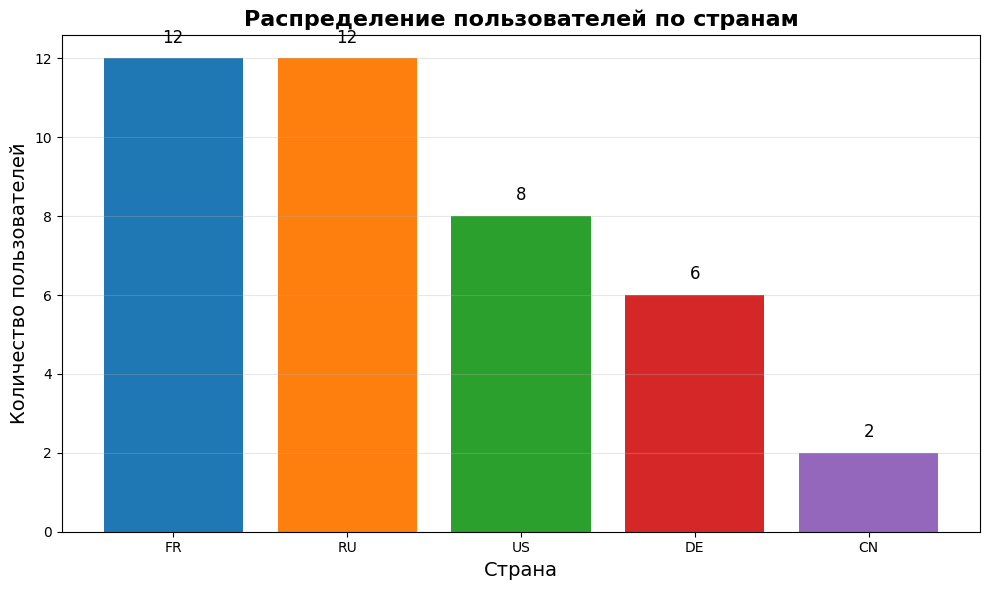

In [11]:
print("БАЗОВЫЙ EDA: РАСПРЕДЕЛЕНИЯ И ЧАСТОТЫ")

# Распределение по странам
print("РАСПРЕДЕЛЕНИЕ ПО СТРАНАМ:")
country_counts = df_clean['country'].value_counts()
country_percentage = (df_clean['country'].value_counts(normalize=True) * 100).round(2)

country_dist = pd.DataFrame({
    'Количество': country_counts,
    'Процент (%)': country_percentage
})

display(country_dist)

# Визуализация распределения по странам
plt.figure(figsize=(10, 6))
bars = plt.bar(country_counts.index, country_counts.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Распределение пользователей по странам', fontsize=16, fontweight='bold')
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             str(int(height)), ha='center', va='bottom', fontsize=12)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('figures/country_distribution.png', dpi=300, bbox_inches='tight')
print("График сохранен: figures/country_distribution.png")
plt.show()

In [ ]:
print("ГРУППИРОВКИ И АГРЕГАТЫ:")

# Группировка по странам с агрегатами
print("Статистика по странам:")
country_stats = df_clean.groupby('country').agg({
    'user_id': 'count',
    'age': ['mean', 'median', 'min', 'max'],
    'purchases': ['mean', 'sum', 'max'],
    'revenue': ['mean', 'sum', 'max']
}).round(2)

# Переименовываем столбцы для удобства
country_stats.columns = [
    'Кол-во пользователей',
    'Средний возраст', 'Медианный возраст', 'Мин возраст', 'Макс возраст',
    'Средние покупки', 'Всего покупок', 'Макс покупок',
    'Средняя выручка', 'Общая выручка', 'Макс выручка'
]

display(country_stats)

# Создаем КОПИЮ DataFrame для добавления нового столбца
df_with_avg = df_clean.copy()

# Средний чек по странам (выручка на одну покупку)
print("Средний чек по странам:")
df_with_avg['avg_check'] = df_with_avg.apply(
    lambda row: row['revenue'] / row['purchases'] if row['purchases'] > 0 else 0,
    axis=1
)

avg_check_stats = df_with_avg[df_with_avg['purchases'] > 0].groupby('country')['avg_check'].agg([
    'mean', 'median', 'std', 'count'
]).round(2)

avg_check_stats = avg_check_stats.rename(columns={
    'mean': 'Средний чек',
    'median': 'Медианный чек',
    'std': 'Ст. отклонение',
    'count': 'Кол-во пользователей'
})

display(avg_check_stats)

# Обновляем df_clean для дальнейшего использования
df_clean = df_with_avg.copy()

ГРУППИРОВКИ И АГРЕГАТЫ:
Статистика по странам:


,Кол-во пользователей,Средний возраст,Медианный возраст,Мин возраст,Макс возраст,Средние покупки,Всего покупок,Макс покупок,Средняя выручка,Общая выручка,Макс выручка
country,,,,,,,,,,,
CN,2,24.00,24.0,20.0,28.0,4.50,9,7,1054.00,2108,1652
DE,6,34.60,35.0,18.0,52.0,6.50,39,11,1445.50,8673,2475
FR,12,46.25,42.0,22.0,120.0,4.25,51,7,675.92,8111,1608
RU,12,30.58,28.5,5.0,54.0,4.58,55,8,813.33,9760,2086
US,8,36.71,39.0,23.0,51.0,4.62,37,9,557.38,4459,980


Средний чек по странам:


,Средний чек,Медианный чек,Ст. отклонение,Кол-во пользователей
country,,,,
CN,232.00,232.0,5.66,2
DE,223.67,235.5,56.82,6
FR,143.30,124.5,73.86,10
RU,178.10,183.0,65.92,10
US,135.75,101.5,100.02,8


### Выводы по анализу данных

**Основные наблюдения:**

1. **Географическое распределение**: Наибольшее количество пользователей из FR и RU (по 30%), наименьшее из CN (5%).

2. **Экономические показатели**:
   - Самая высокая средняя выручка в DE (1445.50) и CN (1054.00)
   - Самый высокий средний чек в CN (232) и DE (223.67)
   - Германия также показывает максимальную выручку на пользователя (2475)

3. **Возрастные группы**: 
   - Больше всего пользователей в возрасте 26-50 лет
   - Наибольшая средняя выручка у группы "26-35" (1009.60)
   - Пользователи до 18 лет совершают больше покупок в среднем (8 покупок)

4. **Зависимость выручки от покупок**: Наблюдается положительная корреляция - чем больше покупок, тем выше выручка.

In [15]:
print("АНАЛИЗ ПО ВОЗРАСТНЫМ ГРУППАМ:")

# Создаем КОПИЮ для добавления возрастных групп
df_age = df_clean.copy()

# Создаем возрастные группы
age_bins = [0, 18, 25, 35, 50, 65, 100]
age_labels = ['До 18', '18-25', '26-35', '36-50', '51-65', '65+']

df_age['age_group'] = pd.cut(df_age['age'], bins=age_bins, labels=age_labels, right=False)

# Группировка по возрастным группам
age_group_stats = df_age.groupby('age_group', observed=False).agg({
    'user_id': 'count',
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum'],
    'avg_check': 'mean'
}).round(2)

# Переименовываем столбцы
age_group_stats.columns = [
    'Кол-во пользователей',
    'Средние покупки', 'Всего покупок',
    'Средняя выручка', 'Общая выручка',
    'Средний чек'
]

display(age_group_stats)

АНАЛИЗ ПО ВОЗРАСТНЫМ ГРУППАМ:


,Кол-во пользователей,Средние покупки,Всего покупок,Средняя выручка,Общая выручка,Средний чек
age_group,,,,,,
До 18,1,8.00,8,1488.00,1488,186.00
18-25,9,4.44,40,628.89,5660,120.89
26-35,10,5.30,53,1009.60,10096,172.70
36-50,11,4.18,46,870.55,9576,188.45
51-65,6,5.00,30,596.67,3580,124.33
65+,0,NaN,0,NaN,0,NaN


ВИЗУАЛИЗАЦИЯ: ГИСТОГРАММА ВОЗРАСТА
Гистограмма сохранена: figures/age_histogram.png


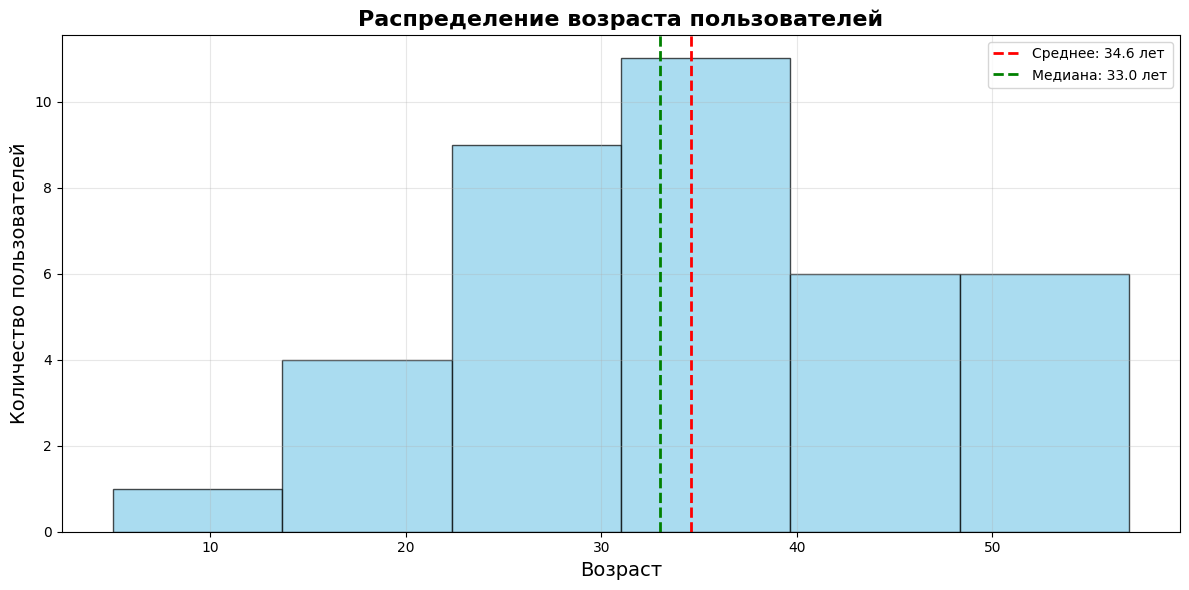

In [16]:
print("ВИЗУАЛИЗАЦИЯ: ГИСТОГРАММА ВОЗРАСТА")

plt.figure(figsize=(12, 6))

# Фильтруем выбросы в возрасте
age_data = df_clean['age'].dropna()
age_data_filtered = age_data[(age_data >= 0) & (age_data <= 100)]

# Определяем оптимальное количество бинов
n_bins = min(20, int(np.sqrt(len(age_data_filtered))))

# Строим гистограмму
n, bins, patches = plt.hist(age_data_filtered, bins=n_bins, 
                           edgecolor='black', alpha=0.7, 
                           color='skyblue', density=False)

plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.title('Распределение возраста пользователей', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Добавляем линии для среднего и медианы
mean_age = age_data_filtered.mean()
median_age = age_data_filtered.median()

plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, 
           label=f'Среднее: {mean_age:.1f} лет')
plt.axvline(median_age, color='green', linestyle='--', linewidth=2,
           label=f'Медиана: {median_age:.1f} лет')

plt.legend()
plt.tight_layout()

# Сохраняем график
plt.savefig('figures/age_histogram.png', dpi=300, bbox_inches='tight')
print("Гистограмма сохранена: figures/age_histogram.png")
plt.show()

ВИЗУАЛИЗАЦИЯ: БОКСПЛОТ ВЫРУЧКИ ПО СТРАНАМ
Боксплот сохранен: figures/revenue_boxplot.png


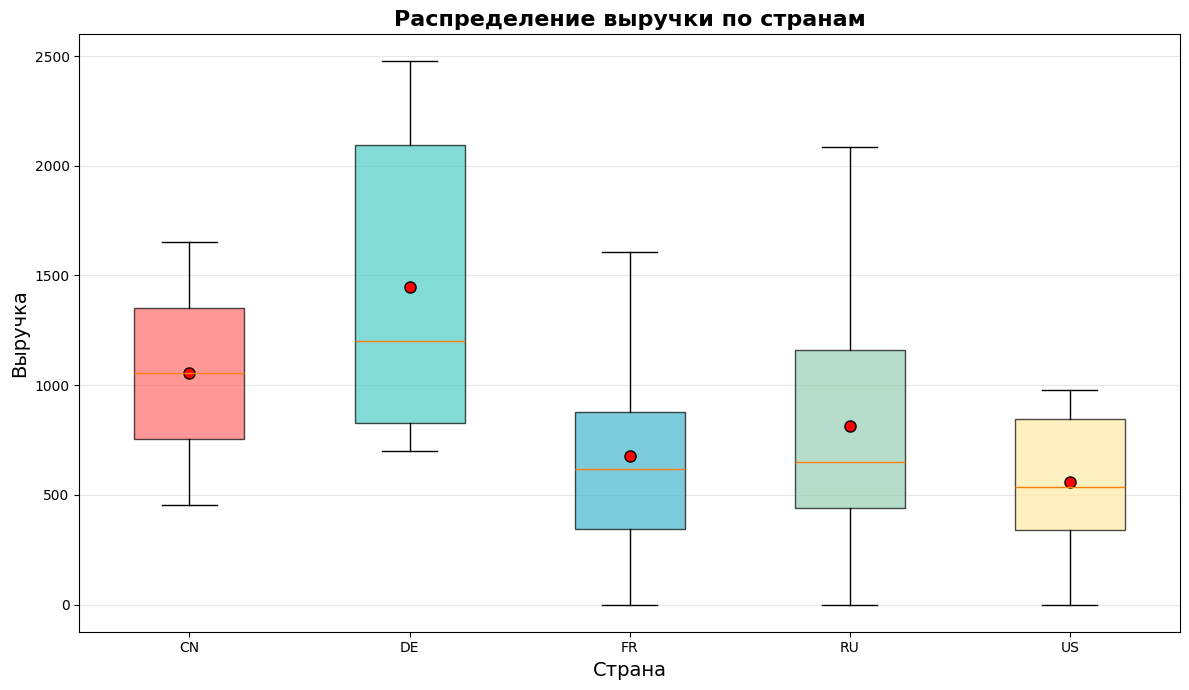

In [18]:
print("ВИЗУАЛИЗАЦИЯ: БОКСПЛОТ ВЫРУЧКИ ПО СТРАНАМ")

plt.figure(figsize=(12, 7))

# Подготавливаем данные
countries = sorted(df_clean['country'].unique())
data_to_plot = [df_clean[df_clean['country'] == c]['revenue'].dropna() for c in countries]

# Создаем боксплот
boxplot = plt.boxplot(data_to_plot, tick_labels=countries, patch_artist=True)

# Настраиваем цвета
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.xlabel('Страна', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.title('Распределение выручки по странам', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Добавляем средние значения
for i, country in enumerate(countries, 1):
    mean_val = df_clean[df_clean['country'] == country]['revenue'].mean()
    plt.plot(i, mean_val, 'ro', markersize=8, markeredgecolor='black')

plt.tight_layout()
plt.savefig('figures/revenue_boxplot.png', dpi=300, bbox_inches='tight')
print("Боксплот сохранен: figures/revenue_boxplot.png")
plt.show()

ВИЗУАЛИЗАЦИЯ: SCATTER PLOT (ПОКУПКИ VS ВЫРУЧКА)
Scatter plot сохранен: figures/purchases_vs_revenue_scatter.png


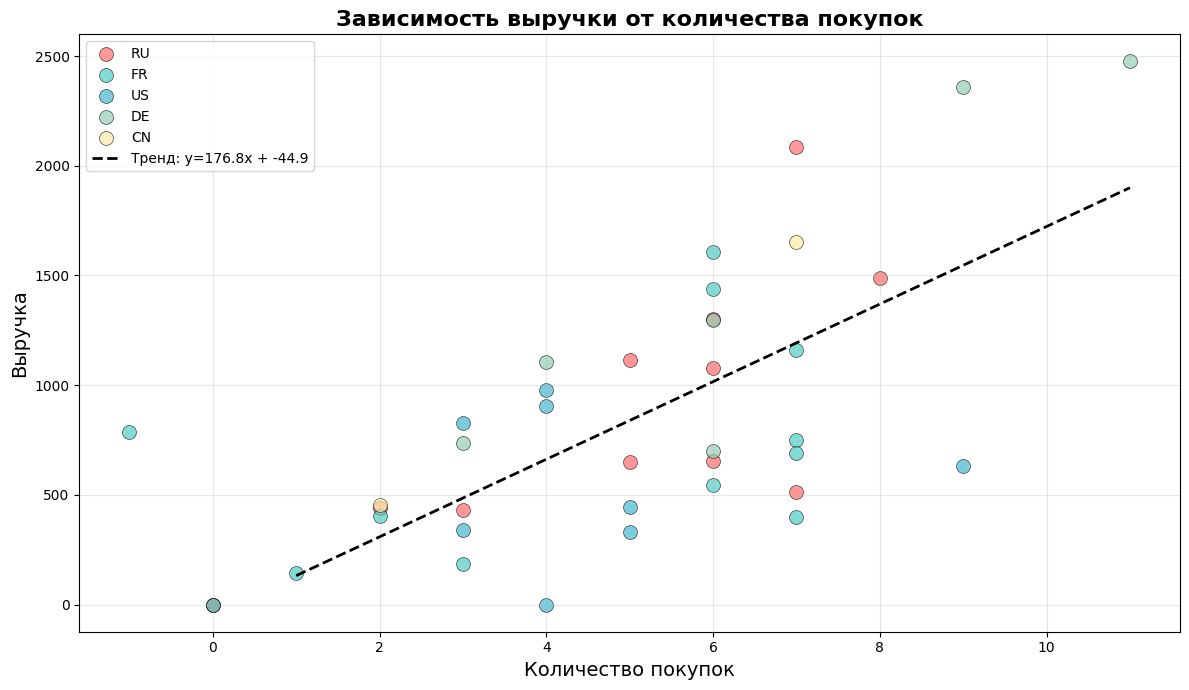

In [19]:
print("ВИЗУАЛИЗАЦИЯ: SCATTER PLOT (ПОКУПКИ VS ВЫРУЧКА)")

plt.figure(figsize=(12, 7))

# Определяем цвета для стран
country_colors = {
    'RU': '#FF6B6B',
    'FR': '#4ECDC4', 
    'US': '#45B7D1',
    'DE': '#96CEB4',
    'CN': '#FFEAA7'
}

# Используем df_with_avg (который содержит avg_check)
df_for_plot = df_with_avg.copy()

# Создаем scatter plot
for country, color in country_colors.items():
    country_data = df_for_plot[df_for_plot['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'],
               alpha=0.7, s=100, c=color, label=country,
               edgecolors='black', linewidth=0.5)

plt.xlabel('Количество покупок', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.title('Зависимость выручки от количества покупок', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Страна', title_fontsize=13)

# Добавляем линию тренда
valid_data = df_for_plot[(df_for_plot['purchases'] > 0) & (df_for_plot['revenue'] >= 0)]
if len(valid_data) > 1:
    z = np.polyfit(valid_data['purchases'], valid_data['revenue'], 1)
    p = np.poly1d(z)
    x_range = np.linspace(valid_data['purchases'].min(), valid_data['purchases'].max(), 100)
    plt.plot(x_range, p(x_range), "k--", linewidth=2, 
            label=f'Тренд: y={z[0]:.1f}x + {z[1]:.1f}')
    plt.legend()

plt.tight_layout()
plt.savefig('figures/purchases_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
print("Scatter plot сохранен: figures/purchases_vs_revenue_scatter.png")
plt.show()

ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ: СРЕДНИЙ ЧЕК ПО СТРАНАМ
График сохранен: figures/avg_check_by_country.png


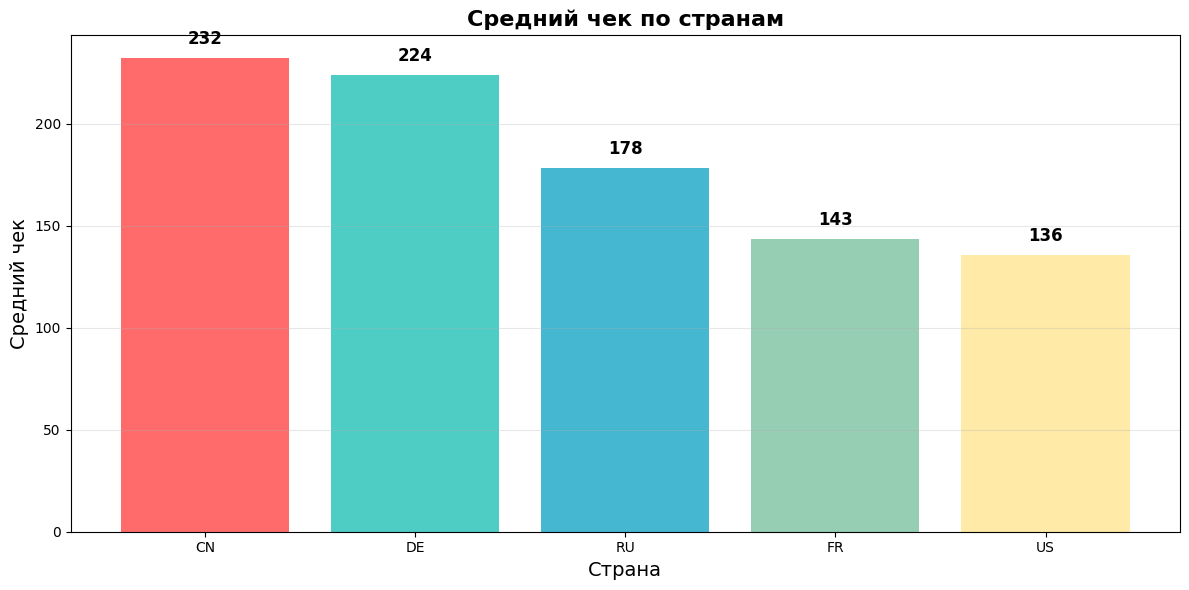

In [20]:
print("ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ: СРЕДНИЙ ЧЕК ПО СТРАНАМ")

plt.figure(figsize=(12, 6))

# Сортируем страны по среднему чеку
avg_check_sorted = avg_check_stats['Средний чек'].sort_values(ascending=False)

# Создаем bar plot
bars = plt.bar(avg_check_sorted.index, avg_check_sorted.values,
              color=colors[:len(avg_check_sorted)])

plt.xlabel('Страна', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.title('Средний чек по странам', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{height:.0f}', ha='center', va='bottom',
            fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/avg_check_by_country.png', dpi=300, bbox_inches='tight')
print("График сохранен: figures/avg_check_by_country.png")
plt.show()